# Quickstart

Install and download a sample waveform:

In [69]:
!pip install zerosyl
!wget https://storage.googleapis.com/zerospeech-checkpoints/5895-34629-0010.flac


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
--2026-02-15 14:33:17--  https://storage.googleapis.com/zerospeech-checkpoints/5895-34629-0010.flac
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.54.27, 192.178.54.187, 142.251.47.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.54.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44534 (43K) [audio/flac]
Saving to: ‘5895-34629-0010.flac.4’

5895-34629-0010.fla 100%[===================>]  43.49K  --.-KB/s    in 0.03s   

2026-02-15 14:33:17 (1.54 MB/s) - ‘5895-34629-0010.flac.4’ saved [44534/44534]



In [70]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import torchaudio
from zerosyl import ZeroSylContinuous, ZeroSylDiscrete, ZeroSylCollapsed

Define helper function to plot

In [71]:
def view_on_melspec(wav, starts=None, ends=None, ids=None):
    tMel = torchaudio.transforms.MelSpectrogram(
        n_fft=1024,
        win_length=400,
        hop_length=320,
    )
    tDB = torchaudio.transforms.AmplitudeToDB(top_db=80)
    melspec = tDB(tMel(wav.squeeze()))
    plt.figure(figsize=(10, 4))
    plt.imshow(melspec, aspect="auto", origin="lower")
    if starts is not None and ends is not None:
        assert len(starts) == len(ends)
        if ids is None:
            ids = range(len(starts))
        for start, end, id in zip(starts, ends, ids):
            plt.axvline(start, c="w")
            plt.axvline(end, c="w")
            mid = (start + end) / 2
            plt.text(
                x=mid,
                y=tMel.n_mels / 2,
                s=str(int(id)),
                c="w",
                ha="center",
                va="center",
                fontsize=16,
                rotation=90,
            )

Load a waveform

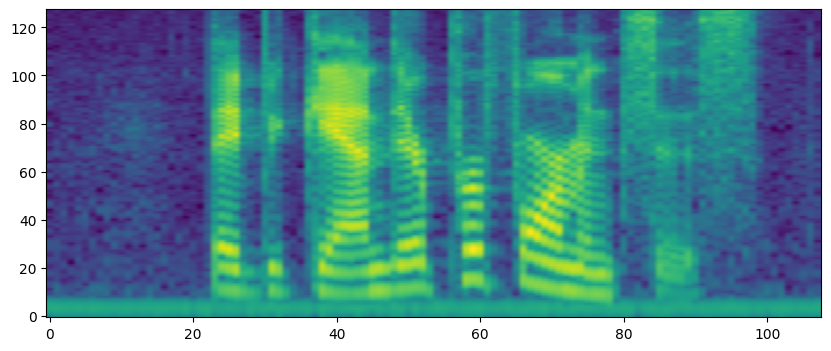

In [72]:
wav, sr = torchaudio.load("5895-34629-0010.flac")
assert sr == 16000
view_on_melspec(wav)
Audio(wav, rate=sr)

For segmenting and encoding continuous embeddings for those segments:

In [73]:
zerosyl_continuous = ZeroSylContinuous.from_remote()

tensor([ 0, 18, 22, 28, 35, 46, 54, 62, 72, 81, 94])
tensor([ 18,  22,  28,  35,  46,  54,  62,  72,  81,  94, 107])
torch.Size([11, 1024])


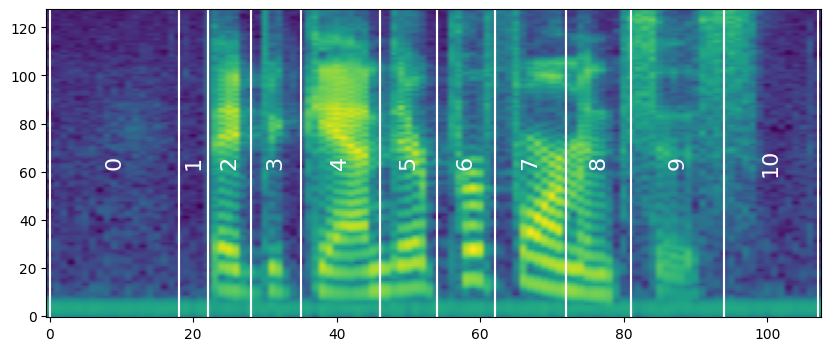

In [74]:
starts, ends, embeddings = zerosyl_continuous.encode(wav)

print(starts)
print(ends)
print(embeddings.shape)

view_on_melspec(wav, starts, ends)

For segmenting and encoding cluster IDs (silences may be fragmented)

In [75]:
zerosyl_discrete = ZeroSylDiscrete.from_remote()

tensor([ 0, 18, 22, 28, 35, 46, 54, 62, 72, 81, 94])
tensor([ 18,  22,  28,  35,  46,  54,  62,  72,  81,  94, 107])
tensor([2856,  503, 9017, 3307, 5905, 4960, 8289, 5426, 1995,  612, 7103])


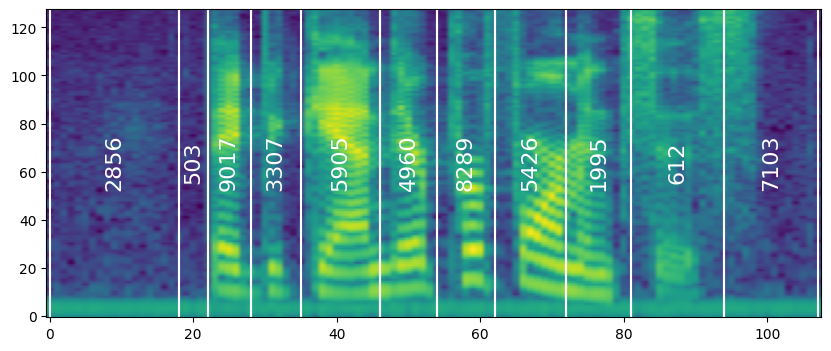

In [76]:
starts, ends, cluster_ids = zerosyl_discrete.encode(wav)

print(starts)
print(ends)
print(cluster_ids)

view_on_melspec(wav, starts, ends, cluster_ids)

For segmenting and encoding into langauge modeling IDs (silences are merged)

In [77]:
zerosyl_collapsed = ZeroSylCollapsed.from_remote()

tensor([ 0, 22, 28, 35, 46, 54, 62, 72, 81, 94])
tensor([ 22,  28,  35,  46,  54,  62,  72,  81,  94, 107])
tensor([9115, 2875, 9052, 1924, 1773, 4732, 2188, 5790, 6117, 9115])


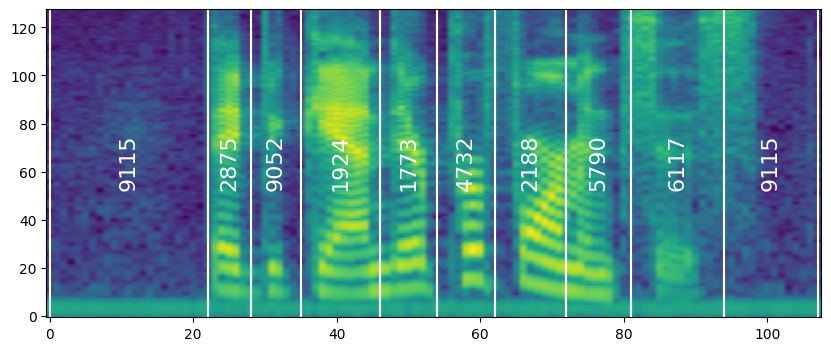

In [78]:
starts_merged, ends_merged, ids = zerosyl_collapsed.encode(wav)

print(starts_merged)
print(ends_merged)
print(ids)

view_on_melspec(wav, starts_merged, ends_merged, ids)